Taxas diárias

In [2]:
import json
import pandas as pd

with open('dados/Taxas de juros - Diário.json', 'r', encoding='utf-8') as arquivo:
    dados = json.load(arquivo)

In [3]:
data_daily =  pd.DataFrame(dados)
data_daily = data_daily.drop('@odata.context', axis=1)

from pandas import json_normalize
data_daily = json_normalize(data_daily['value'])

Taxas mensais

In [4]:
with open('dados/Taxas de juros - Mensal.json', 'r', encoding='utf-8') as arquivo:
    data_monthly = json.load(arquivo)


data_monthly =  pd.DataFrame(data_monthly)
#data = data.drop('@odata.context', axis=1)

data_monthly = json_normalize(data_monthly['value'])


Dados sgs

In [6]:
import sgs
import pandas as pd

# Definir a série que você quer baixar (ex: Selic diária - código 11)
codigo_selic = 11

# Definir o período desejado
data_inicial = '01/01/2020'
data_final = '31/12/2024' # Ajuste para a data mais recente ou data de interesse

df_selic = sgs.dataframe([codigo_selic], start='02/01/2018', end='31/12/2018')

#Concessões de crédito com recursos livres - Pessoas físicas - Crédito pessoal total
df_vol = sgs.dataframe([20672], start='01/01/2012', end='31/12/2024')

#Saldo da carteira de crédito com recursos livres - Pessoas físicas - Crédito pessoal total
df_saldo = sgs.dataframe([20580], start='01/01/2012', end='31/12/2024')



Concessões de crédito com recursos livres

In [ ]:
#Concessões de crédito com recursos livres - Pessoas físicas - Crédito pessoal total
df_vol = sgs.dataframe([20672], start='01/01/2012', end='31/12/2024')

#Saldo da carteira de crédito com recursos livres - Pessoas físicas - Crédito pessoal total
df_saldo = sgs.dataframe([20580], start='01/01/2012', end='31/12/2024')

Prazo médio das concessões de crédito com recursos livres

In [ ]:
#Prazo médio das concessões de crédito com recursos livres - Pessoas físicas - Total (meses)

df_prazo = sgs.dataframe([20878], start='01/01/2012', end='31/12/2024')

Dados if.data

In [1]:
import requests
import pandas as pd

ifdata = 'https://olinda.bcb.gov.br/olinda/servico/IFDATA/versao/v1/odata/IfDataValores(AnoMes=@AnoMes,TipoInstituicao=@TipoInstituicao,Relatorio=@Relatorio)?@AnoMes=202412&@TipoInstituicao=2&@Relatorio=\'11\'&$top=100000&$format=json&$select=TipoInstituicao,CodInst,AnoMes,NomeRelatorio,NumeroRelatorio,Grupo,Conta,NomeColuna,DescricaoColuna,Saldo'

req = requests.get(ifdata)
info = req.json()

df_info = pd.DataFrame(info['value'])



In [55]:
df_info_livre = df_info[(df_info['Grupo'] == 'Empréstimo com Consignação em Folha') | (df_info['Grupo'] == 'Empréstimo sem Consignação em Folha') | (df_info['Grupo'] == 'Cartão de Crédito') | (df_info['Grupo'] == 'Outros Créditos')]


In [ ]:
df_Ativo_total = df_info_livre[df_info_livre['NomeColuna'] == 'Total']

Ativo_total = df_Ativo_total['Saldo'].sum()

df_mktsh = pd.DataFrame(df_Ativo_total.groupby('CodInst')['Saldo'].sum())
df_mktsh['MarketShare'] = (df_mktsh['Saldo'] / Ativo_total)
df_mktsh['MarketShare^2'] = (df_mktsh['MarketShare'] ** 2)

HHI = df_mktsh['MarketShare^2'].sum() * 10000

print(HHI)



813.4131385648583


In [32]:
import requests
from bcb import ODataAPI

a = ODataAPI('https://olinda.bcb.gov.br/olinda/servico/IFDATA/versao/v1/odata/')
a.describe()

#a.describe("ListaDeRelatorio")
#a.describe("IfDataCadastro")
a.describe("IfDataValores")

#ep = a.get_endpoint('IfDataValores')
ep = bcb.odata.api.IFDATA()

#dir(ep)

df_ifdata = (ep.query()
                .filter(ep.TipoInstituicao == 1) # Filtro opcional: TipoInstituicao igual a 1
                .collect())


FunctionImports:
  ListaDeRelatorio
  IfDataCadastro
  IfDataValores

Function: IfDataValores
Parameters: AnoMes <int>, TipoInstituicao <int>, Relatorio <str>
EntitySet: _IfDataValores
EntityType: br.gov.bcb.olinda.servico.IFDATA.TipoIfValores
Properties: TipoInstituicao <int>, CodInst <str>, AnoMes <str>, NomeRelatorio <str>, NumeroRelatorio <str>, Grupo <str>, Conta <str>, NomeColuna <str>, DescricaoColuna <str>, Saldo <float>


NameError: name 'bcb' is not defined

EntitySets:
  TaxasJurosMensalPorMes
  ParametrosConsulta
  TaxasJurosDiariaPorInicioPeriodo
  ConsultaUnificada
  ConsultaDatas

EntitySet (Endpoint): TaxasJurosDiariaPorInicioPeriodo
EntityType: br.gov.bcb.olinda.servico.taxaJuros.TaxaJurosDiaria
Properties: InicioPeriodo<str>, FimPeriodo<str>, codigoSegmento<str>, Segmento<str>, codigoModalidade<str>, Modalidade<str>, Posicao<int>, InstituicaoFinanceira<str>, TaxaJurosAoMes<float>, TaxaJurosAoAno<float>, cnpj8<str>


<Axes: title={'center': 'Mediana das Taxas de Juros de Cheque Especial - Fonte:BCB'}, xlabel='Data', ylabel='Taxa'>

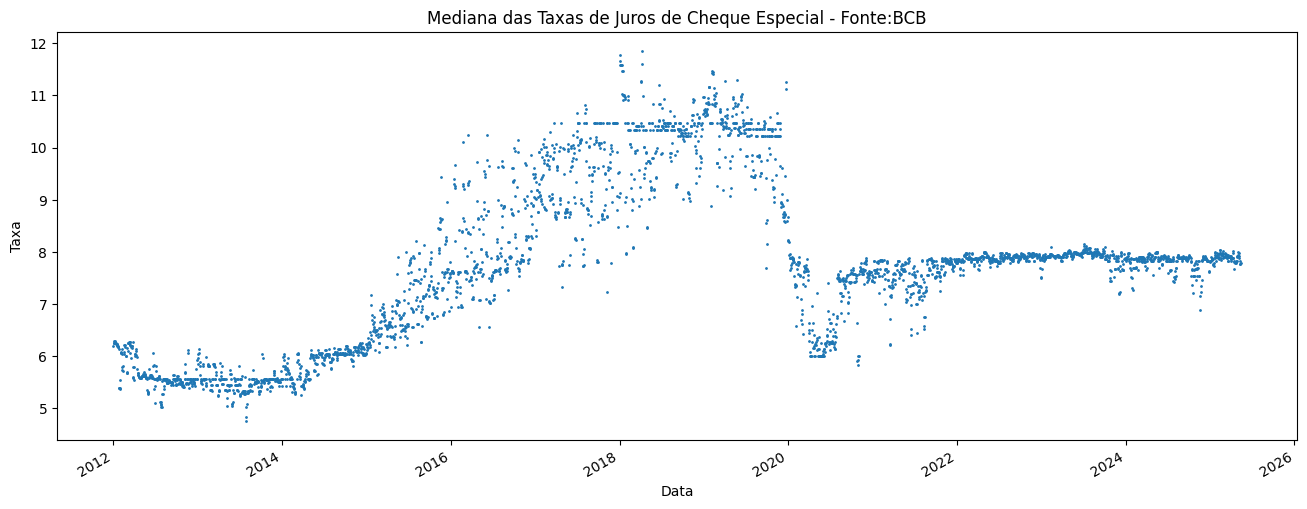

In [15]:
from bcb import TaxaJuros
import matplotlib

em = TaxaJuros()
em.describe()

em.describe("TaxasJurosDiariaPorInicioPeriodo")

ep = em.get_endpoint('TaxasJurosDiariaPorInicioPeriodo')
df_cheque = (ep.query()
               .filter(ep.Segmento == 'PESSOA FÍSICA',
                       ep.Modalidade == 'Cheque especial - Pré-fixado')
               .collect())

grp = df_cheque.groupby('InicioPeriodo')

df_mean = grp.agg({'TaxaJurosAoMes': 'median'})

df_mean['TaxaJurosAoMes'].plot(figsize=(16,6), style='o', markersize=1,
                               xlabel='Data', ylabel='Taxa',
                               title='Mediana das Taxas de Juros de Cheque Especial - Fonte:BCB')


Concessões de crédito - Pessoas físicas - Total

In [16]:
import sgs
import pandas as pd

# Definir a série que você quer baixar (ex: Selic diária - código 11)
codigo_cocessões_pf = 20633

# Definir o período desejado
data_inicial = '01/01/2020'
data_final = '31/12/2024' # Ajuste para a data mais recente ou data de interesse

df_conces = sgs.dataframe([codigo_cocessões_pf], start='01/01/2012', end='31/12/2024')


In [18]:
import sgs
import pandas as pd

# Definir a série que você quer baixar (ex: Selic diária - código 11)
codigo_selic = 11

# Definir o período desejado
data_inicial = '01/01/2020'
data_final = '31/12/2024' # Ajuste para a data mais recente ou data de interesse

df_selic = sgs.dataframe([codigo_selic], start='02/01/2018', end='31/12/2018')

#Concessões de crédito com recursos livres - Pessoas físicas - Crédito pessoal total
df_vol = sgs.dataframe([20672], start='01/01/2012', end='31/12/2024')

#Saldo da carteira de crédito com recursos livres - Pessoas físicas - Crédito pessoal total
df_saldo = sgs.dataframe([20580], start='01/01/2012', end='31/12/2024')



Sistema de Informações de Créditos – SCR

In [23]:
scr_2412 = pd.read_csv('dados/planilha_202412.csv', sep=';')

In [28]:
scr_2412_pf = scr_2412[(scr_2412['cliente'] == 'PF') & (scr_2412['origem'] == 'Sem destinação específica')]


In [30]:
scr_2412_pj = scr_2412[(scr_2412['cliente'] == 'PJ') & (scr_2412['origem'] == 'Sem destinação específica')]